Reuse of a dataset is heavily impacted by:  
* visibility of author (h-index)
* quality of the dataset
* type of dataset (highly specific or wide foundational aka mapping baseline things)

In [1]:
import requests
import re
import pandas as pd
import numpy as np
import tqdm
import urllib.parse
import xml.etree.ElementTree as ET
import os

/home/compomics/miniconda3/envs/reprocessing/lib/python3.11/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
peptide_atlas=["PXD000004","PXD000036","PXD000050","PXD000089","PXD000109","PXD000134","PXD000238","PXD000262","PXD000275","PXD000309","PXD000332","PXD000342","PXD000387","PXD000394","PXD000395","PXD000427","PXD000442","PXD000447","PXD000449","PXD000497","PXD000529","PXD000531","PXD000533","PXD000535","PXD000561","PXD000563","PXD000597","PXD000605","PXD000612","PXD000623","PXD000651","PXD000652","PXD000653","PXD000654","PXD000656","PXD000661","PXD000782","PXD000803","PXD000815","PXD000836","PXD000851","PXD000865","PXD000866","PXD000900","PXD000901","PXD000953","PXD000970","PXD000985","PXD000987","PXD001025","PXD001189","PXD001194","PXD001205","PXD001242","PXD001333","PXD001374","PXD001398","PXD001406","PXD001428","PXD001464","PXD001543","PXD001550","PXD001559","PXD001571","PXD001581","PXD001620","PXD001856","PXD001872","PXD001874","PXD001889","PXD001898","PXD001933","PXD001987","PXD001991","PXD002072","PXD002098","PXD002131","PXD002179","PXD002224","PXD002255","PXD002279","PXD002286","PXD002391","PXD002395","PXD002425","PXD002439","PXD002453","PXD002516","PXD002612","PXD002613","PXD002635","PXD002645","PXD002761","PXD002765","PXD002783","PXD002802","PXD002854","PXD002951","PXD002990","PXD003028","PXD003051","PXD003115","PXD003407","PXD003408","PXD003409","PXD003413","PXD003417","PXD003458","PXD003492","PXD003531","PXD003533","PXD003547","PXD003595","PXD003668","PXD003681","PXD003691","PXD003790","PXD003850","PXD003935","PXD003947","PXD004023","PXD004034","PXD004076","PXD004092","PXD004131","PXD004181","PXD004223","PXD004233","PXD004242","PXD004352","PXD004424","PXD004447","PXD004452","PXD004471","PXD004678","PXD004746","PXD004781","PXD004859","PXD004894","PXD004927","PXD005296","PXD004964","PXD004981","PXD005084","PXD005141","PXD005174","PXD005176","PXD005214","PXD005219","PXD005291","PXD005336","PXD005354","PXD005355","PXD005445","PXD005487","PXD005704","PXD005712","PXD005748","PXD005838","PXD005940","PXD005942","PXD006122","PXD006201","PXD006215","PXD006271","PXD006371","PXD006455","PXD006465","PXD006471","PXD006557","PXD006614","PXD006633","PXD006675","PXD006687","PXD006723","PXD006775","PXD006833","PXD006939","PXD007088","PXD007160","PXD007203","PXD007214","PXD007596","PXD007635","PXD007679","PXD007756","PXD007846","PXD007860","PXD007878","PXD007884","PXD007916","PXD007935","PXD007985","PXD008029","PXD008068","PXD008127","PXD008163","PXD008333","PXD008373","PXD008434","PXD008441","PXD008467","PXD008468","PXD008500","PXD008512","PXD008570","PXD008571","PXD008572","PXD008832","PXD008937","PXD008952","PXD008984","PXD009021","PXD009348","PXD009531","PXD009589","PXD009602","PXD009646","PXD009737","PXD009738","PXD009752","PXD009754","PXD009755","PXD009784","PXD009801","PXD009840","PXD009893","PXD009925","PXD010025","PXD010093","PXD010138","PXD010154","PXD010159","PXD010301","PXD010372","PXD010446","PXD010450","PXD010471","PXD010528","PXD010551","PXD010560","PXD010603","PXD010630","PXD010807","PXD010812","PXD010899","PXD010911","PXD011075","PXD011076","PXD011085","PXD011257","PXD011298","PXD011482","PXD011524","PXD011628","PXD011723","PXD011797","PXD011957","PXD011967","PXD012042","PXD012083","PXD012125","PXD012131","PXD012203","PXD012210","PXD012308","PXD012348","PXD012498","PXD012655","PXD012671","PXD012771","PXD012797","PXD013015","PXD013057","PXD013064","PXD013120","PXD013234","PXD013296","PXD013599","PXD013649","PXD013831","PXD014017","PXD014031","PXD014058","PXD014083","PXD014300","PXD014371","PXD014372","PXD014381","PXD014397","PXD014433","PXD014525","PXD014593","PXD014804","PXD015006","PXD015039","PXD015223","PXD015249","PXD015398","PXD015578","PXD015690","PXD015899","PXD015899","PXD015901","PXD015903","PXD015908","PXD015905","PXD005353","PXD015906","PXD015907","PXD015913","PXD015947","PXD015957","PXD016069","PXD016117","PXD016297","PXD016433","PXD016437","PXD016582","PXD016957","PXD017052","PXD017083","PXD017149","PXD017195","PXD017211","PXD017407","PXD017682","PXD017710","PXD017821","PXD017824","PXD017834","PXD017994","PXD018357","PXD018450","PXD018581","PXD018594","PXD018760","PXD018855","PXD019103","PXD019252","PXD019258","PXD019387","PXD019403","PXD019483","PXD019643","PXD019909","PXD019910","PXD019936","PXD020011","PXD020079","PXD020130","PXD020186","PXD020224","PXD020292","PXD020389","PXD020557","PXD020727","PXD020750","PXD021177","PXD021265","PXD021373","PXD021441","PXD021482","PXD021487","PXD021521","PXD021647","PXD022020","PXD022144","PXD022150","PXD022194","PXD022265","PXD022296","PXD022469","PXD022523","PXD022612","PXD022633","PXD022817","PXD022886","PXD022930","PXD022949","PXD022950","PXD023032","PXD023143","PXD023508","PXD023648","PXD023650","PXD023835","PXD024206","PXD024216","PXD024893","PXD024965","PXD025073","PXD025261","PXD025311","PXD025345","PXD025346","PXD025475","PXD025499","PXD025716","PXD025877","PXD025898","PXD026184","PXD026997","PXD027025","PXD027456","PXD027504","PXD027664","PXD027696","PXD027766","PXD027859","PXD028123","PXD028237","PXD028633","PXD028647","PXD028738","PXD028985","PXD029567","PXD029613","PXD029648","PXD030260","PXD030601","PXD030670","PXD031108","PXD031188","PXD031587","PXD032097","PXD032677","PXD033169","PXD033383","PXD033463","PXD033811","PXD034017","PXD034772","PXD034773","PXD034820","PXD034935","PXD035072","PXD035096","PXD035324","PXD035768","PXD036654","PXD036856","PXD037253","PXD037270","PXD037340","PXD037451","PXD037486","PXD038005","PXD038849","PXD039826","PXD042025","PXD043982","PXD044056"]
scop3p = ["PXD000474", "PXD000836", "PXD001060", "PXD001170", "PXD000612", "PXD001333", "PXD001374", "PXD002394", "PXD002990", "PXD004252", "PXD001546", "PXD001550", "PXD000089", "PXD003198", "PXD001565", "PXD002255", "PXD002286", "PXD002646", "PXD003531", "PXD004415", "PXD004447", "PXD004452", "PXD004940", "PXD005366", "PXD000674", "PXD006114", "PXD003215", "PXD003657", "PXD003660", "PXD003709", "PXD002057", "PXD002436", "PXD000964", "PXD000680", "PXD000218", "PXD006482"]
tissue = ["PXD000072", "PXD006517", "PXD006776", "PXD006863", "PXD009258", "PXD009393", "PXD009261", "PXD003534", "PXD009118", "PXD008205", "PXD009396", "PXD010286", "PXD008568", "PXD010154", "PXD001674", "PXD006805", "PXD001985", "PXD002437", "PXD009606", "PXD009348", "PXD020192", "PXD006833", "PXD001325", "PXD002211", "PXD009438", "PXD010821", "PXD009917", "PXD004682", "PXD004626", "PXD000533", "PXD007745", "PXD009112", "PXD009916", "PXD007975", "PXD009737", "PXD009310", "PXD006576", "PXD006570", "PXD007123", "PXD009893", "PXD011214", "PXD009870", "PXD006578", "PXD008311", "PXD002990", "PXD000529", "PXD005436", "PXD009813", "PXD007959", "PXD002212", "PXD001326", "PXD006589", "PXD009196", "PXD011492", "PXD009061", "PXD008992", "PXD007744", "PXD000004", "PXD010690", "PXD011309", "PXD009784", "PXD000561", "PXD015239", "PXD006847", "PXD003215", "PXD003075", "PXD008252", "PXD003533", "PXD015523", "PXD010093", "PXD005733", "PXD009021", "PXD002014", "PXD008130", "PXD017213", "PXD000228", "PXD008440", "PXD010150", "PXD000440", "PXD009880", "PXD004928", "PXD002620", "PXD010271", "PXD006571", "PXD009709", "PXD006607", "PXD012971", "PXD007592", "PXD005477", "PXD010708", "PXD008443", "PXD011000", "PXD012970", "PXD005755", "PXD001524", "PXD004355", "PXD010284", "PXD011175", "PXD011178", "PXD011204", "PXD009343", "PXD005055", "PXD010260", "PXD007740", "PXD012960", "PXD004683", "PXD007846", "PXD004540", "PXD007080", "PXD001425", "PXD017261", "PXD003045", "PXD006176", "PXD007258", "PXD005323", "PXD007081", "PXD016865", "PXD005220", "PXD009645", "PXD008465", "PXD009144", "PXD005709", "PXD010508", "PXD006522", "PXD006465", "PXD002883", "PXD009781", "PXD004443", "PXD016261", "PXD009029", "PXD008832", "PXD009754", "PXD009440", "PXD010469", "PXD005970", "PXD006268", "PXD001324", "PXD008795", "PXD006911", "PXD006743", "PXD017268", "PXD009996", "PXD008723", "PXD006572", "PXD009254", "PXD011609", "PXD018678", "PXD000605", "PXD011183", "PXD008934", "PXD009056", "PXD008354", "PXD017976", "PXD006897", "PXD008996", "PXD009755", "PXD007122", "PXD009300", "PXD016437", "PXD009624", "PXD009350", "PXD009646", "PXD011241", "PXD009716", "PXD016555", "PXD004625", "PXD007624", "PXD010698", "PXD007705", "PXD007873", "PXD017804", "PXD009752", "PXD006265", "PXD010294", "PXD007894", "PXD005693", "PXD018682", "PXD004624", "PXD008029", "PXD008682", "PXD002133", "PXD007231", "PXD013649"]
deeplc = ["PXD009449", "PXD000953", "PXD000954", "PXD006932", "PXD013477", "PXD005573", "PXD010154", "PXD000612", "PXD003472", "PXD008812"]
ms2pip = ["PXD008034" ,"PXD000954", "PXD001587", "PXD009495", "PXD001189"   ]
ms2rescore = ["PXD021398","PXD015408", "PXD005231" ]
quantms = ["PXD004683", "PXD004684", "PXD004873", "PXD012574", "PXD022992", "PXD023423", "PXD025560", "PXD030881", "PXD032263", "PXD033169", "PXD027817", "PXD002137", "PXD003497", "PXD025864", "PXD023508", "PXD003539", "PXD023508", "PXD018830", "PXD021394", "PXD028618", "PXD010429", "PXD002395", "PXD000672", "PXD004691", "PXD014943", "PXD028251", "PXD014414", "PXD014145", "PXD020248", "PXD020109", "PXD030671", "PXD027008", "PXD000561", "PXD000865", "PXD000612", "PXD002179", "PXD002854", "PXD002854", "PXD002854", "PXD006559", "PXD010154", "PXD020192", "PXD010271", "PXD004452", "PXD016999", "PXD016999", "PXD012755", "PXD004143", "PXD005445", "PXD005445", "PXD008441", "PXD008467", "PXD008468", "PXD009219", "PXD012131", "PXD019909", "PXD019909", "PXD008934", "PXD006675", "PXD008722", "PXD018678", "PXD018678", "PXD012636", "PXD011349", "PXD005736", "PXD008840", "PXD022661", "PXD013523", "PXD019123", "PXD030304", "PXD003947", "PXD004242", "PXD008333", "PXD009348", "PXD009737", "PXD009737", "PXD009737", "PXD010899", "PXD010899", "PXD0011839", "PXD013231", "PXD013231", "PXD017052", "PXD017052", "PXD017834", "PXD017834", "PXD019817", "PXD020727", "PXD022469", "PXD023650", "PXD024364", "PXD024364", "PXD027125", "PXD029009", "PXD030598", "PXD032212", "PXD034244", "PXD036609", "PXD037340", "PXD037340", "PXD037682", "PXD038526", "PXD038669", "PXD038669", "PXD038674", "PXD039023", "PXD040438"]
other = ["PXD010154", "PXD013477", "PXD000070", "PXD001684", "PXD002266", "PXD005207", "PXD009157", "PXD009465", "PXD012143", "PXD015093", "PXD015833", "PXD020381", "PXD026474", "PXD001676", "PXD005709", "PXD005693", "PXD020454", "PXD010458", "PXD004452", "PXD006055", "PXD002646", "PXD004415", "PXD006475", "PXD004442", "PXD002394", "PXD002765", "PXD003531", "PXD004373", "PXD005214", "PXD004817", "PXD001189", "PXD004940", "PXD004981", "PXD001170", "PXD002055", "PXD000970", "PXD003708", "PXD004181", "PXD004945", "PXD005366", "PXD003108", "PXD005181", "PXD004447", "PXD003712", "PXD003529", "PXD004340", "PXD002286", "PXD002172", "PXD004252", "PXD003908", "PXD000901", "PXD000985", "PXD001222", "PXD004357", "PXD001543", "PXD003660", "PXD000275", "PXD002704", "PXD003627", "PXD003198", "PXD001739", "PXD002022", "PXD002023", "PXD001812", "PXD001603", "PXD003492", "PXD003523", "PXD003822", "PXD001962", "PXD002990", "PXD002839", "PXD003115", "PXD001563", "PXD001560", "PXD002425", "PXD002735", "PXD002614", "PXD002850", "PXD002635", "PXD001565", "PXD002135", "PXD002871", "PXD000696", "PXD002127", "PXD002496", "PXD001374", "PXD001060", "PXD000863", "PXD000599", "PXD002255", "PXD001559", "PXD001428", "PXD001115", "PXD001196", "PXD001333", "PXD002072", "PXD001550", "PXD001546", "PXD000474", "PXD001101", "PXD001180", "PXD001186", "PXD000523", "PXD000497", "PXD001114", "PXD001121", "PXD001381", "PXD001305", "PXD001094", "PXD001129", "PXD001253", "PXD000750", "PXD000612", "PXD000496", "PXD000836", "PXD000293", "PXD000293", "PXD000681", "PXD000680", "PXD000462", "PXD000472", "PXD000597", "PXD000242", "PXD000451", "PXD000238", "PXD000341", "PXD000225", "PXD000222", "PXD000217", "PXD000185", "PXD000089"]
expr = ["PXD010154", "PXD005819", "PXD004143", "PXD006233", "PXD012755", "PXD001608", "PXD00209", "PXD000547", "PXD000548", "PXD010271", "PXD004332", "PXD006675", "PXD008934", "PXD012131", "PXD020187", "PXD015079", "PXD00487354", "PXD00067255", "PXD00469156", "PXD01494357", "PXD00349758", "PXD00458959", "PXD01419460", "PXD00353961", "PXD00106462", "PXD01091263", "PXD001800", "PXD002918", "PXD003204", "PXD009577", "PXD011360", "PXD011536", "PXD011755", "PXD012636", "PXD014893", "PXD016003", "PXD017671", "PXD019852", "PXD026910", "PXD027772", "PXD004452", "PXD003668", "PXD005354", "PXD005355", "PXD002395", "PXD005940", "PXD005942", "PXD005946", "PXD003636", "PXD003430", "PXD003452", "PXD003515", "PXD004132", "PXD003615", "PXD004159", "PXD008222", "PXD000815", "PXD002619", "PXD000867", "PXD000288", "PXD003155", "PXD004612", "PXD005230", "PXD009909", "PXD012307", "PXD009639", "PXD019394", "PXD012636", "PXD019431", "PXD022614", "PXD004496", "PXD008736", "PXD012677", "PXD006692", "PXD016793", "PXD004364", "PXD001839", "PXD013543", "PXD016958", "PXD003375", "PXD015928"] 
expr2= ["PXD000561","PXD010154","PXD005445","PXD010603","PXD010138","PXD005819","PXD004143","PXD006233","PXD012755","PXD001325","PXD012431","PXD001608","PXD002029","PXD000547","PXD000548","PXD010271","PXD004332","PXD006675","PXD008934","PXD013523","PXD012203","PXD000672","PXD001064","PXD012131","PXD008722","PXD020187","PXD015981","PXD015079","PXD003497","PXD014943","PXD004691","PXD004873","PXD004589","PXD010912","PXD014194","PXD003539","PXD004612","PXD005230","PXD009909","PXD012307","PXD009639","PXD019394","PXD000867","PXD002905","PXD000288","PXD000666","PXD003155","PXD012636","PXD019431","PXD022614","PXD004496","PXD008736","PXD012677","PXD006692","PXD016793","PXD004364","PXD001839","PXD013543","PXD016958","PXD003375","PXD015928","PXD005709","PXD005693","PXD020454","PXD001676","PXD002137","PXD014511","PXD019504","PXD019103","PXD010458","PXD031556","PXD032899","PXD001800","PXD002918","PXD003204","PXD009577","PXD011360","PXD011536","PXD011755","PXD012636","PXD014893","PXD016003","PXD017671","PXD019852","PXD026910","PXD027772","PXD013868","PXD031419","PXD012254","PXD001506","PXD001764","PXD019594","PXD025705","PXD004684","PXD032076","PXD025431","PXD002732","PXD022872","PXD033060","PXD018830","PXD039665","PXD034908"]
expr = set(expr).union(set(expr2))
ecoli_peptideatlas = ["PXD000498", "PXD007864", "PXD011023", "PXD013273", "PXD013610", "PXD016001", "PXD016074", "PXD016669", "PXD017618", "PXD019140", "PXD019288", "PXD022070", "PXD022526", "PXD024138", "PXD025088", "PXD025706", "PXD029931", "PXD032954", "PXD012611", "PXD020249", "PXD020785", "PXD030650", "PXD020207", "PXD037221", "PXD008921", "PXD031694", "PXD023158", "PXD030690", "PXD030346", "PXD030345", "PXD029347", "PXD008369", "PXD035590", "PXD036749", "PXD040621", "PXD041301", "PXD043473", "PXD045084", "PXD050358"]
deeplc = ["PXD006932", "PXD010595", "PXD004732", "PXD000954", "PXD013477", "PXD005573", "PXD010154", "PXD003472", "PXD008812", "PXD009449"]
timsrescore = ["PXD019086", "PXD042416", "PXD03878"]
im2deep = ["PXD039469", "PXD035986", "PXD043511", "PXD036206", "PXD037288", "PXD036127",  "PXD035987", "PXD038824", "PXD042478", "PXD040890", "PXD037622", "PXD049281", "PXD043166", "PXD042114", "PXD035675", "PXD036970", "PXD036746", "PXD037945", "PXD039646", "PXD037089", "PXD040481", "PXD043226", "PXD040521", "PXD038840", "PXD048960", "PXD036191", "PXD036482", "PXD043382", "PXD046507"]
matrisome = ["PXD005554", "PXD000456", "PXD001025", "PXD002555", "PXD005130", "PXD003215", "PXD006562", "PXD006563", "PXD003517", "PXD006521", "PXD006579", "PXD001765"]
git_annotated = os.listdir('/home/compomics/git/proteomics-sample-metadata/annotated-projects')


len(peptide_atlas), len(scop3p), len(tissue), len(deeplc), len(ms2pip), len(ms2rescore), len(quantms), len(other), len(expr), len(git_annotated)


(453, 36, 183, 10, 5, 3, 107, 131, 130, 243)

In [3]:
peptide_atlas=["PXD000004","PXD000036","PXD000050","PXD000089","PXD000109","PXD000134","PXD000238","PXD000262","PXD000275","PXD000309","PXD000332","PXD000342","PXD000387","PXD000394","PXD000395","PXD000427","PXD000442","PXD000447","PXD000449","PXD000497","PXD000529","PXD000531","PXD000533","PXD000535","PXD000561","PXD000563","PXD000597","PXD000605","PXD000612","PXD000623","PXD000651","PXD000652","PXD000653","PXD000654","PXD000656","PXD000661","PXD000782","PXD000803","PXD000815","PXD000836","PXD000851","PXD000865","PXD000866","PXD000900","PXD000901","PXD000953","PXD000970","PXD000985","PXD000987","PXD001025","PXD001189","PXD001194","PXD001205","PXD001242","PXD001333","PXD001374","PXD001398","PXD001406","PXD001428","PXD001464","PXD001543","PXD001550","PXD001559","PXD001571","PXD001581","PXD001620","PXD001856","PXD001872","PXD001874","PXD001889","PXD001898","PXD001933","PXD001987","PXD001991","PXD002072","PXD002098","PXD002131","PXD002179","PXD002224","PXD002255","PXD002279","PXD002286","PXD002391","PXD002395","PXD002425","PXD002439","PXD002453","PXD002516","PXD002612","PXD002613","PXD002635","PXD002645","PXD002761","PXD002765","PXD002783","PXD002802","PXD002854","PXD002951","PXD002990","PXD003028","PXD003051","PXD003115","PXD003407","PXD003408","PXD003409","PXD003413","PXD003417","PXD003458","PXD003492","PXD003531","PXD003533","PXD003547","PXD003595","PXD003668","PXD003681","PXD003691","PXD003790","PXD003850","PXD003935","PXD003947","PXD004023","PXD004034","PXD004076","PXD004092","PXD004131","PXD004181","PXD004223","PXD004233","PXD004242","PXD004352","PXD004424","PXD004447","PXD004452","PXD004471","PXD004678","PXD004746","PXD004781","PXD004859","PXD004894","PXD004927","PXD005296","PXD004964","PXD004981","PXD005084","PXD005141","PXD005174","PXD005176","PXD005214","PXD005219","PXD005291","PXD005336","PXD005354","PXD005355","PXD005445","PXD005487","PXD005704","PXD005712","PXD005748","PXD005838","PXD005940","PXD005942","PXD006122","PXD006201","PXD006215","PXD006271","PXD006371","PXD006455","PXD006465","PXD006471","PXD006557","PXD006614","PXD006633","PXD006675","PXD006687","PXD006723","PXD006775","PXD006833","PXD006939","PXD007088","PXD007160","PXD007203","PXD007214","PXD007596","PXD007635","PXD007679","PXD007756","PXD007846","PXD007860","PXD007878","PXD007884","PXD007916","PXD007935","PXD007985","PXD008029","PXD008068","PXD008127","PXD008163","PXD008333","PXD008373","PXD008434","PXD008441","PXD008467","PXD008468","PXD008500","PXD008512","PXD008570","PXD008571","PXD008572","PXD008832","PXD008937","PXD008952","PXD008984","PXD009021","PXD009348","PXD009531","PXD009589","PXD009602","PXD009646","PXD009737","PXD009738","PXD009752","PXD009754","PXD009755","PXD009784","PXD009801","PXD009840","PXD009893","PXD009925","PXD010025","PXD010093","PXD010138","PXD010154","PXD010159","PXD010301","PXD010372","PXD010446","PXD010450","PXD010471","PXD010528","PXD010551","PXD010560","PXD010603","PXD010630","PXD010807","PXD010812","PXD010899","PXD010911","PXD011075","PXD011076","PXD011085","PXD011257","PXD011298","PXD011482","PXD011524","PXD011628","PXD011723","PXD011797","PXD011957","PXD011967","PXD012042","PXD012083","PXD012125","PXD012131","PXD012203","PXD012210","PXD012308","PXD012348","PXD012498","PXD012655","PXD012671","PXD012771","PXD012797","PXD013015","PXD013057","PXD013064","PXD013120","PXD013234","PXD013296","PXD013599","PXD013649","PXD013831","PXD014017","PXD014031","PXD014058","PXD014083","PXD014300","PXD014371","PXD014372","PXD014381","PXD014397","PXD014433","PXD014525","PXD014593","PXD014804","PXD015006","PXD015039","PXD015223","PXD015249","PXD015398","PXD015578","PXD015690","PXD015899","PXD015899","PXD015901","PXD015903","PXD015908","PXD015905","PXD005353","PXD015906","PXD015907","PXD015913","PXD015947","PXD015957","PXD016069","PXD016117","PXD016297","PXD016433","PXD016437","PXD016582","PXD016957","PXD017052","PXD017083","PXD017149","PXD017195","PXD017211","PXD017407","PXD017682","PXD017710","PXD017821","PXD017824","PXD017834","PXD017994","PXD018357","PXD018450","PXD018581","PXD018594","PXD018760","PXD018855","PXD019103","PXD019252","PXD019258","PXD019387","PXD019403","PXD019483","PXD019643","PXD019909","PXD019910","PXD019936","PXD020011","PXD020079","PXD020130","PXD020186","PXD020224","PXD020292","PXD020389","PXD020557","PXD020727","PXD020750","PXD021177","PXD021265","PXD021373","PXD021441","PXD021482","PXD021487","PXD021521","PXD021647","PXD022020","PXD022144","PXD022150","PXD022194","PXD022265","PXD022296","PXD022469","PXD022523","PXD022612","PXD022633","PXD022817","PXD022886","PXD022930","PXD022949","PXD022950","PXD023032","PXD023143","PXD023508","PXD023648","PXD023650","PXD023835","PXD024206","PXD024216","PXD024893","PXD024965","PXD025073","PXD025261","PXD025311","PXD025345","PXD025346","PXD025475","PXD025499","PXD025716","PXD025877","PXD025898","PXD026184","PXD026997","PXD027025","PXD027456","PXD027504","PXD027664","PXD027696","PXD027766","PXD027859","PXD028123","PXD028237","PXD028633","PXD028647","PXD028738","PXD028985","PXD029567","PXD029613","PXD029648","PXD030260","PXD030601","PXD030670","PXD031108","PXD031188","PXD031587","PXD032097","PXD032677","PXD033169","PXD033383","PXD033463","PXD033811","PXD034017","PXD034772","PXD034773","PXD034820","PXD034935","PXD035072","PXD035096","PXD035324","PXD035768","PXD036654","PXD036856","PXD037253","PXD037270","PXD037340","PXD037451","PXD037486","PXD038005","PXD038849","PXD039826","PXD042025","PXD043982","PXD044056"]
combined_list = []
combined_list.extend(peptide_atlas)
combined_list.extend(scop3p)
combined_list.extend(tissue)
combined_list.extend(deeplc)
combined_list.extend(ms2pip)
combined_list.extend(ms2rescore)
combined_list.extend(quantms)
combined_list.extend(other)
combined_list.extend(expr)
combined_list.extend(ecoli_peptideatlas)
combined_list.extend(timsrescore)
combined_list.extend(im2deep)
combined_list.extend(matrisome)
# combined_list.extend(git_annotated)

combined_list = set(combined_list)
len(combined_list)


957

# Expression atlas PXDs  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9990129/  
PXD010154, PXD005819, PXD004143, PXD006233, PXD012755, PXD001608, PXD00209, PXD000547, PXD000548, PXD010271, PXD004332, PXD006675, PXD008934, PXD012131, PXD020187, PXD015079  

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9197839/#CR54  
PXD00487354, PXD00067255, PXD00469156, PXD01494357, PXD00349758, PXD00458959, PXD01419460, PXD00353961, PXD00106462, PXD01091263  

https://pubs.acs.org/doi/10.1021/acs.jproteome.3c00741  
PXD001800, PXD002918, PXD003204, PXD009577, PXD011360, PXD011536, PXD011755, PXD012636, PXD014893, PXD016003, PXD017671, PXD019852, PXD026910, PXD027772  

https://www.nature.com/articles/s41597-021-00890-2#Tab1
PXD004452, PXD003668, PXD005354, PXD005355, PXD002395, PXD005940, PXD005942, PXD005946, PXD003636, PXD003430, PXD003452, PXD003515, PXD004132, PXD003615, PXD004159, PXD008222, PXD000815, PXD002619  

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1010174  
PXD000867, PXD000288, PXD003155, PXD004612, PXD005230, PXD009909, PXD012307, PXD009639, PXD019394, PXD012636, PXD019431, PXD022614, PXD004496, PXD008736, PXD012677, PXD006692, PXD016793, PXD004364, PXD001839, PXD013543, PXD016958, PXD003375, PXD015928

In [14]:
expr = ["PXD010154", "PXD005819", "PXD004143", "PXD006233", "PXD012755", "PXD001608", "PXD00209", "PXD000547", "PXD000548", "PXD010271", "PXD004332", "PXD006675", "PXD008934", "PXD012131", "PXD020187", "PXD015079", "PXD00487354", "PXD00067255", "PXD00469156", "PXD01494357", "PXD00349758", "PXD00458959", "PXD01419460", "PXD00353961", "PXD00106462", "PXD01091263", "PXD001800", "PXD002918", "PXD003204", "PXD009577", "PXD011360", "PXD011536", "PXD011755", "PXD012636", "PXD014893", "PXD016003", "PXD017671", "PXD019852", "PXD026910", "PXD027772", "PXD004452", "PXD003668", "PXD005354", "PXD005355", "PXD002395", "PXD005940", "PXD005942", "PXD005946", "PXD003636", "PXD003430", "PXD003452", "PXD003515", "PXD004132", "PXD003615", "PXD004159", "PXD008222", "PXD000815", "PXD002619", "PXD000867", "PXD000288", "PXD003155", "PXD004612", "PXD005230", "PXD009909", "PXD012307", "PXD009639", "PXD019394", "PXD012636", "PXD019431", "PXD022614", "PXD004496", "PXD008736", "PXD012677", "PXD006692", "PXD016793", "PXD004364", "PXD001839", "PXD013543", "PXD016958", "PXD003375", "PXD015928"] 
expr2= ["PXD000561","PXD010154","PXD005445","PXD010603","PXD010138","PXD005819","PXD004143","PXD006233","PXD012755","PXD001325","PXD012431","PXD001608","PXD002029","PXD000547","PXD000548","PXD010271","PXD004332","PXD006675","PXD008934","PXD013523","PXD012203","PXD000672","PXD001064","PXD012131","PXD008722","PXD020187","PXD015981","PXD015079","PXD003497","PXD014943","PXD004691","PXD004873","PXD004589","PXD010912","PXD014194","PXD003539","PXD004612","PXD005230","PXD009909","PXD012307","PXD009639","PXD019394","PXD000867","PXD002905","PXD000288","PXD000666","PXD003155","PXD012636","PXD019431","PXD022614","PXD004496","PXD008736","PXD012677","PXD006692","PXD016793","PXD004364","PXD001839","PXD013543","PXD016958","PXD003375","PXD015928","PXD005709","PXD005693","PXD020454","PXD001676","PXD002137","PXD014511","PXD019504","PXD019103","PXD010458","PXD031556","PXD032899","PXD001800","PXD002918","PXD003204","PXD009577","PXD011360","PXD011536","PXD011755","PXD012636","PXD014893","PXD016003","PXD017671","PXD019852","PXD026910","PXD027772","PXD013868","PXD031419","PXD012254","PXD001506","PXD001764","PXD019594","PXD025705","PXD004684","PXD032076","PXD025431","PXD002732","PXD022872","PXD033060","PXD018830","PXD039665","PXD034908"]
expr = set(expr).union(set(expr2))
print(len(expr))


130


In [15]:
final_df = pd.DataFrame(columns=['expressionatlas_PXD', 'SDRF', 'PMC', 'reuse', 'DB', 'suppl'])
final_df.expressionatlas_PXD = list(set(expr))
final_df.set_index('expressionatlas_PXD', inplace=True)
final_df.head()

,SDRF,PMC,reuse,DB,suppl
expressionatlas_PXD,,,,,
PXD005946,NaN,NaN,NaN,NaN,NaN
PXD003636,NaN,NaN,NaN,NaN,NaN
PXD003497,NaN,NaN,NaN,NaN,NaN
PXD031419,NaN,NaN,NaN,NaN,NaN
PXD005354,NaN,NaN,NaN,NaN,NaN


# SDRF annotation

Parsing PRIDE to see the longlasting impact of metadata annotation.  
See impact over 1y 2y 5y 10y 15y 25y post submission of a SDRF versus not annotated dataset.  
Get a table that looks like:  
PXD - Annotated T/F - Reuse 1y - Reuse 2y - etc.

In [4]:
sdrf = pd.DataFrame(columns=['PXD', 'original_publication_date', 'number_of_reuses', '1y', '2y', '5y', '10y', '15y', '20y', '25y'])

In [5]:
import requests
import random

random_PXDS = []
url = "https://www.ebi.ac.uk/pride/ws/archive/v2/search/projects"
params = {
    "size": 100,
    "sort": "random",
    "publicationDate": "2014-01-01T00:00:00Z TO 2024-12-31T23:59:59Z"
}

response = requests.get(url, params=params)
data = response.json()

while '_embedded' in data.keys():
    for project in data['_embedded']['compactprojects']:
        random_PXDS.append(project['accession'])
    if 'next' in data['_links'].keys():
        response = requests.get(data['_links']['next']['href'])
        data = response.json()
    if len(random_PXDS) > 100000:
        break

print(random_PXDS)


['PXD056761', 'PXD056755', 'PXD056750', 'PXD056678', 'PXD056674', 'PXD056650', 'PXD056475', 'PXD056399', 'PXD056364', 'PXD056312', 'PXD056235', 'PXD056230', 'PXD056225', 'PXD056223', 'PXD056217', 'PXD056211', 'PXD056184', 'PXD056175', 'PXD056104', 'PXD056101', 'PXD056097', 'PXD056093', 'PXD056076', 'PXD056041', 'PXD056031', 'PXD056026', 'PXD056020', 'PXD056002', 'PXD055984', 'PXD055943', 'PXD055937', 'PXD055934', 'PXD055898', 'PXD055781', 'PXD055778', 'PXD055749', 'PXD055748', 'PXD055745', 'PXD055735', 'PXD055599', 'PXD055592', 'PXD055583', 'PXD055546', 'PXD055473', 'PXD055466', 'PXD055391', 'PXD055374', 'PXD055293', 'PXD055286', 'PXD055277', 'PXD055263', 'PXD055262', 'PXD055235', 'PXD055231', 'PXD055228', 'PXD055227', 'PXD055210', 'PXD055203', 'PXD055174', 'PXD055171', 'PXD055119', 'PXD055094', 'PXD055090', 'PXD055056', 'PXD055051', 'PXD055046', 'PXD055042', 'PXD055039', 'PXD055003', 'PXD054985', 'PXD054928', 'PXD054875', 'PXD054861', 'PXD054855', 'PXD054826', 'PXD054809', 'PXD054805'

In [6]:
# list of sdrf annotated PXDs
annotated_projects = []
new_data = []
page_number = 0

while True:
    url = f"https://www.ebi.ac.uk/pride/ws/archive/v2/search/projects?keyword=sdrf&pageSize=100&page={page_number}"
    print(f"Page {page_number}")
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
    else:
        print("Error:", response.status_code)
        break

    # continue as long as _embedded is a key in data.keys() this means there is content
    if '_embedded' in data.keys():
        for i in range(0, len(data['_embedded']['compactprojects'])):
            PXD = data['_embedded']['compactprojects'][i]['accession']
            original_publication_date = data['_embedded']['compactprojects'][i]['publicationDate']
            ref = data['_embedded']['compactprojects'][i]['references']
            print(PXD, original_publication_date)
            new_data.append([PXD, original_publication_date, ref])
            annotated_projects.append(PXD)
        page_number += 1
    else:
        print(f"No content after page {page_number}")
        break

Page 0


PXD056475 2024-10-10
PXD055781 2024-09-19
PXD055056 2024-08-23
PXD054070 2024-08-30
PXD053491 2024-06-28
PXD053462 2024-08-22
PXD053438 2024-06-28
PXD053214 2024-10-06
PXD053049 2024-10-05
PXD052706 2024-10-14
PXD052504 2024-08-22
PXD051991 2024-07-15
PXD051952 2024-07-11
PXD051943 2024-06-11
PXD051889 2024-05-16
PXD051459 2024-06-23
PXD051408 2024-04-20
PXD051376 2024-08-28
PXD051103 2024-04-09
PXD051022 2024-05-15
PXD050916 2024-06-23
PXD050812 2024-08-10
PXD050316 2024-09-13
PXD050222 2024-04-02
PXD050212 2024-05-22
PXD050173 2024-07-04
PXD050008 2024-05-10
PXD049795 2024-04-05
PXD049700 2024-09-19
PXD049436 2024-03-14
PXD049375 2024-04-13
PXD049360 2024-04-13
PXD049174 2024-06-12
PXD049062 2024-08-06
PXD049016 2024-04-02
PXD049014 2024-04-02
PXD048928 2024-08-09
PXD048840 2024-02-28
PXD048839 2024-02-28
PXD048836 2024-02-28
PXD048736 2024-01-24
PXD048617 2024-02-21
PXD048568 2024-09-16
PXD048381 2024-07-25
PXD048363 2024-01-17
PXD048344 2024-08-27
PXD048340 2024-06-12
PXD047908 202

In [7]:
annotated_projects_df = pd.DataFrame(new_data, columns=['PXD', 'original_publication_date', 'ref'])
annotated_projects_df.head()

,PXD,original_publication_date,ref
0,PXD056475,2024-10-10,[]
1,PXD055781,2024-09-19,[]
2,PXD055056,2024-08-23,[]
3,PXD054070,2024-08-30,[]
4,PXD053491,2024-06-28,[]


# PRIDE reuse

In [8]:
temp_df = pd.DataFrame(columns=['PXD', 'number_of_reuses', 'years_of_reuses'])
reused_ones = []
not_reused_ones = []
#reanalysis data
for pxd in tqdm.tqdm(combined_list):
    url = f"https://www.ebi.ac.uk/pride/ws/archive/v2/projects/reanalysis/{pxd}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        number_of_reuses = len(data['references'])
        years_of_reuses = []
        reused_ones.append(pxd)
        for i in range(len(data['references'])):
            # Extract the year from the string
            year_match = re.search(r'\d{4}', data['references'][i]['referenceLine'])
            if year_match:
                year = year_match.group()
                years_of_reuses.append(year)
            else:
                print("Year not found in the string.")
        #add to temp_df
        new_data = pd.DataFrame({'PXD': [pxd], 'number_of_reuses': [number_of_reuses], 'years_of_reuses': [years_of_reuses]})
        temp_df = pd.concat([temp_df, new_data], ignore_index=True)
    else:
        not_reused_ones.append(pxd)

100%|██████████| 957/957 [01:23<00:00, 11.50it/s]


In [9]:
len(reused_ones), len(not_reused_ones)

(76, 881)

In [10]:
temp_df

,PXD,number_of_reuses,years_of_reuses
0,PXD005336,1,[2019]
1,PXD000529,1,[2018]
2,PXD001194,3,"[2019, 2018, 2019]"
3,PXD004894,3,"[2019, 2018, 2019]"
4,PXD001381,1,[2018]
...,...,...,...
71,PXD006675,1,[2019]
72,PXD000597,1,[2019]
73,PXD010630,1,[2019]
74,PXD005231,1,[2018]


# PMC citations

In [11]:
citation_df = pd.DataFrame(columns=['PXD', 'EuropePMC_number_of_citations', 'EuropePMC_years_of_citations', "EuropePMC_citations_ids", 'PMC_number_of_citations', "PMC_citations_ids"])

for pxd in tqdm.tqdm(combined_list):
    europepmc_number_of_citations = 0
    europepmc_years_of_citations = []
    europepmc_citations_ids = []
    pmc_ids = []
    pcm_number_of_citations = 0
    
    # Define the URL for the Europe PMC search endpoint
    europepmc_url = "https://www.ebi.ac.uk/europepmc/webservices/rest/search"

    # Define the request parameters for Europe PMC
    europepmc_params = {
        "query": pxd,
        "resultType": "lite",
        "pageSize": 100,
        "format": "json"
    }
    europepmc_data = urllib.parse.urlencode(europepmc_params)
    europepmc_response = requests.get(europepmc_url, params=europepmc_params)

    if europepmc_response.status_code == 200:
        europepmc_data = europepmc_response.json()
        if len(europepmc_data) == 1:
            break
        europepmc_number_of_citations = europepmc_data['hitCount']
        europepmc_years_of_citations = []
        europepmc_citations_ids = []

        for pub in europepmc_data['resultList']['result']:
            if 'pmcid' in pub:
                europepmc_citations_ids.append(pub['pmcid'])
            else:
                europepmc_citations_ids.append(pub['id'])
            europepmc_years_of_citations.append(pub['pubYear'])
    else:
        print("EuropePMC Error:", europepmc_response.status_code)
        continue
    
    # # Define the URL for the PMC search endpoint
    # pmc_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pmc&term={pxd}&retmax=100"

    # pmc_response = requests.get(pmc_url)
    # if pmc_response.status_code == 200:
    #     # Parse the XML response
    #     pmc_root = ET.fromstring(pmc_response.content)

    #     # Extract the list of PubMed Central IDs (PMIDs)
    #     pmc_ids = [id_elem.text for id_elem in pmc_root.findall('.//Id')]
    #     pcm_number_of_citations = len(pmc_ids)
    # else:
    #     print(f"PMC Failed to retrieve data for {pxd}")
    #     continue
    
    new_data = pd.DataFrame({'PXD': [pxd], 'EuropePMC_number_of_citations': [europepmc_number_of_citations], 'EuropePMC_years_of_citations': [europepmc_years_of_citations], "EuropePMC_citations_ids": [europepmc_citations_ids], 'PMC_number_of_citations': [pcm_number_of_citations], "PMC_citations_ids": [pmc_ids]})
    citation_df = pd.concat([citation_df, new_data], ignore_index=True)


  0%|          | 2/957 [00:00<01:51,  8.57it/s]

100%|██████████| 957/957 [01:53<00:00,  8.46it/s]


In [12]:
random_citation_df = pd.DataFrame(columns=['PXD', 'EuropePMC_number_of_citations', 'EuropePMC_years_of_citations', "EuropePMC_citations_ids", 'PMC_number_of_citations', "PMC_citations_ids"])
# select 1500 random elemnts from random_PXDS
random_sample_PXDS = random.sample(random_PXDS, 1500)
for pxd in tqdm.tqdm(random_sample_PXDS):
    europepmc_number_of_citations = 0
    europepmc_years_of_citations = []
    europepmc_citations_ids = []
    pmc_ids = []
    pcm_number_of_citations = 0
    
    # Define the URL for the Europe PMC search endpoint
    europepmc_url = "https://www.ebi.ac.uk/europepmc/webservices/rest/search"

    # Define the request parameters for Europe PMC
    europepmc_params = {
        "query": pxd,
        "resultType": "lite",
        "pageSize": 100,
        "format": "json"
    }
    europepmc_data = urllib.parse.urlencode(europepmc_params)
    europepmc_response = requests.get(europepmc_url, params=europepmc_params)

    if europepmc_response.status_code == 200:
        europepmc_data = europepmc_response.json()
        europepmc_number_of_citations = europepmc_data['hitCount']
        europepmc_years_of_citations = []
        europepmc_citations_ids = []

        for pub in europepmc_data['resultList']['result']:
            if 'pmcid' in pub:
                europepmc_citations_ids.append(pub['pmcid'])
            else:
                europepmc_citations_ids.append(pub['id'])
            europepmc_years_of_citations.append(pub['pubYear'])
    else:
        print("EuropePMC Error:", europepmc_response.status_code)
        continue
    
    # # Define the URL for the PMC search endpoint
    # pmc_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pmc&term={pxd}&retmax=100"

    # pmc_response = requests.get(pmc_url)
    # if pmc_response.status_code == 200:
    #     # Parse the XML response
    #     pmc_root = ET.fromstring(pmc_response.content)

    #     # Extract the list of PubMed Central IDs (PMIDs)
    #     pmc_ids = [id_elem.text for id_elem in pmc_root.findall('.//Id')]
    #     pcm_number_of_citations = len(pmc_ids)
    # else:
    #     print(f"PMC Failed to retrieve data for {pxd}")
    #     continue
    
    new_data = pd.DataFrame({'PXD': [pxd], 'EuropePMC_number_of_citations': [europepmc_number_of_citations], 'EuropePMC_years_of_citations': [europepmc_years_of_citations], "EuropePMC_citations_ids": [europepmc_citations_ids], 'PMC_number_of_citations': [pcm_number_of_citations], "PMC_citations_ids": [pmc_ids]})
    random_citation_df = pd.concat([random_citation_df, new_data], ignore_index=True)


  0%|          | 0/1500 [00:00<?, ?it/s]

100%|██████████| 1500/1500 [03:02<00:00,  8.21it/s]


In [13]:
#check if random_citation_df contains PXDs from combined_list
drop_pxds = random_citation_df[random_citation_df.PXD.isin(combined_list)]
random_citation_df = random_citation_df[~random_citation_df.PXD.isin(drop_pxds.PXD)]


# Big projects supplementary

Really big reprocessing studies mention PXDs in their supplementary, making it unqueryable  

ExpressionAtlas: 4451   
* https://pubs.acs.org/doi/10.1021/acs.jproteome.2c00406  
, ProteomicsDB: out of service 
, Peptideatlas:  https://db.systemsbiology.net/sbeams/cgi/PeptideAtlas/buildDetails?atlas_build_id=572  
Consulted on 21/08/2024  


Compomics publications  
* Scop3P: https://pubs.acs.org/doi/full/10.1021/acs.jproteome.0c00306
* Tissue prediction: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10088018/
* DeepLC: https://www.nature.com/articles/s41592-021-01301-5
* MS2Pip: https://pubmed.ncbi.nlm.nih.gov/24078703/  
        https://academic.oup.com/nar/article/47/W1/W295/5480903?login=true
* MS2Rescore: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9411678/
* 
  
Other:  
* quantMS
* matrisomeDB: https://academic.oup.com/nar/article/48/D1/D1136/5581734
* Robles, J., Prakash, A., Vizcaíno, J. A. & Casal, J. I. Integrated meta-analysis of colorectal cancer public proteomic datasets for biomarker discovery and validation. PLoS * Comput Biol 20, e1011828- (2024).    
                PXD001676, PXD005709, PXD005693, PXD020454, PXD010458
                
* Camacho, O. J. M. et al. Phosphorylation in the Plasmodium falciparum proteome: A meta-analysis of publicly available data sets. bioRxiv 2023.11.20.567785 (2023) doi:10.1101/2023.11.20.567785.  
                PXD000070, PXD001684, PXD002266, PXD005207, PXD009157, PXD009465, PXD012143, PXD015093, PXD015833, PXD020381, PXD026474
* Elguoshy, A. et al. Identification and Validation of Human Missing Proteins and Peptides in Public Proteome Databases: Data Mining Strategy. J Proteome Res 16, 4403–4414 (2017).  

* Ochoa, D. et al. The functional landscape of the human phosphoproteome. Nat Biotechnol 38, 365–373 (2020).  
                PXD004452, PXD006055, PXD002646, PXD004415, PXD006475, PXD004442, PXD002394, PXD002765, PXD003531, PXD004373, PXD005214, PXD004817, PXD001189, PXD004940, PXD004981, PXD001170, PXD002055, PXD000970, PXD003708, PXD004181, PXD004945, PXD005366, PXD003108, PXD005181, PXD004447, PXD003712, PXD003529, PXD004340, PXD002286, PXD002172, PXD004252, PXD003908, PXD000901, PXD000985, PXD001222, PXD004357, PXD001543, PXD003660, PXD000275, PXD002704, PXD003627, PXD003198, PXD001739, PXD002022, PXD002023, PXD001812, PXD001603, PXD003492, PXD003523, PXD003822, PXD001962, PXD002990, PXD002839, PXD003115, PXD001563, PXD001560, PXD002425, PXD002735, PXD002614, PXD002850, PXD002635, PXD001565, PXD002135, PXD002871, PXD000696, PXD002127, PXD002496, PXD001374, PXD001060, PXD000863, PXD000599, PXD002255, PXD001559, PXD001428, PXD001115, PXD001196, PXD001333, PXD002072, PXD001550, PXD001546, PXD000474, PXD001101, PXD001180, PXD001186, PXD000523, PXD000497, PXD001114, PXD001121, PXD001381, PXD001305, PXD001094, PXD001129, PXD001253, PXD000750, PXD000612, PXD000496, PXD000836, PXD000293, PXD000293, PXD000681, PXD000680, PXD000462, PXD000472, PXD000597, PXD000242, PXD000451, PXD000238, PXD000341, PXD000225, PXD000222, PXD000217, PXD000185, PXD000089

* https://pubs.acs.org/doi/10.1021/acs.jproteome.2c00075: PXD010154, PXD013477

# IEE, Springer, Elsevier publishers parse articles

In [24]:
from bs4 import BeautifulSoup

### Springer

In [25]:
springer_df = pd.DataFrame(columns=['PXD', 'springer_number_of_citations', 'springer_years_of_citations', "springer_citations_ids"])

for pxd in tqdm.tqdm(expr):
    springer_number_of_citations = 0
    springer_years_of_citations = []
    springer_citations_ids = []

    url = f"https://link.springer.com/search?new-search=true&query={pxd}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.text
        soup = BeautifulSoup(data, 'html.parser')
        titles = soup.find_all('h3', class_="app-card-open__heading",  attrs={'data-test': 'title'})
        springer_number_of_citations = len(titles)
        for title in titles:
            title_text = title.text.strip()
            springer_citations_ids.append(title_text)
            parent_div = title.find_parent('div', class_='app-card-open__main')
            if parent_div:
                publication_date = parent_div.find('span', class_='c-meta__item', attrs={'data-test': 'published'}).get_text().strip()
                springer_years_of_citations.append(publication_date)
    else:
        print("Error:", response.status_code)
    new_data = pd.DataFrame({'PXD': [pxd], 'springer_number_of_citations': [springer_number_of_citations], 'springer_years_of_citations': [springer_years_of_citations], "springer_citations_ids": [springer_citations_ids]})
    springer_df = pd.concat([springer_df, new_data], ignore_index=True)


100%|██████████| 130/130 [01:12<00:00,  1.79it/s]


In [26]:
springer_df.sort_values(by='springer_number_of_citations', ascending=False)

,PXD,springer_number_of_citations,springer_years_of_citations,springer_citations_ids
35,PXD000561,16,"[04 July 2024, 07 October 2023, 06 October 202...",[quantms: a cloud-based pipeline for quantitat...
69,PXD010154,9,"[04 July 2024, 06 October 2021, 07 October 202...",[quantms: a cloud-based pipeline for quantitat...
89,PXD004452,4,"[2022, 17 September 2021, 24 November 2022, 27...",[MaxQuant Module for the Identification of Gen...
83,PXD001064,3,"[14 June 2022, 12 August 2021, 19 July 2017]",[Implementing the reuse of public DIA proteomi...
127,PXD000672,3,"[14 June 2022, 31 May 2019, 02 March 2015]",[Implementing the reuse of public DIA proteomi...
...,...,...,...,...
28,PXD00209,0,[],[]
66,PXD003204,0,[],[]
29,PXD012431,0,[],[]
64,PXD000666,0,[],[]


## Elsevier  

API key: 95c4b95c7211384fab5b926c58d58fb3

In [27]:
import time
elsevier_df = pd.DataFrame(columns=['PXD', 'elsevier_number_of_citations', 'elsevier_years_of_citations', "elsevier_citations_ids"])
counter = 0
for pxd in tqdm.tqdm(expr):
    counter += 1
    elsevier_number_of_citations = 0
    elsevier_years_of_citations = []
    elsevier_citations_ids = []

    api_resource = "https://api.elsevier.com/content/search/sciencedirect?"
    search_param = "query=PXD000561"
    headers = dict()
    headers['X-ELS-APIKey'] = '95c4b95c7211384fab5b926c58d58fb3'
    headers['Accept'] = 'application/json'
    response = requests.get(api_resource + search_param, headers=headers)
    if response.status_code == 200:
        data = response.json()
        elsevier_number_of_citations = int(data["search-results"]['opensearch:totalResults'])
        for i in range(elsevier_number_of_citations):
            title = data["search-results"]['entry'][i]['dc:title']
            publication_date = data["search-results"]['entry'][i]['prism:coverDate']
            elsevier_citations_ids.append(title)
            elsevier_years_of_citations.append(publication_date)
    else:
        print(f'Error found: {response.status_code}')
    new_data = pd.DataFrame({'PXD': [pxd], 'elsevier_number_of_citations': [elsevier_number_of_citations], 'elsevier_years_of_citations': [elsevier_years_of_citations], "elsevier_citations_ids": [elsevier_citations_ids]})
    elsevier_df = pd.concat([elsevier_df, new_data], ignore_index=True)
    
    # Add a 10-second sleep after every 4 requests
    if counter == 3:
        time.sleep(15)
        counter = 0


  2%|▏         | 2/130 [00:00<00:44,  2.89it/s]

Error found: 429


 11%|█         | 14/130 [01:03<06:56,  3.59s/it]

Error found: 429


 18%|█▊        | 23/130 [01:50<06:25,  3.60s/it]

Error found: 429


 20%|██        | 26/130 [02:06<06:13,  3.59s/it]

Error found: 429


 27%|██▋       | 35/130 [02:53<05:41,  3.60s/it]

Error found: 429


 36%|███▌      | 47/130 [03:56<04:59,  3.60s/it]

Error found: 429


 45%|████▌     | 59/130 [04:59<04:16,  3.61s/it]

Error found: 429


 55%|█████▍    | 71/130 [06:02<03:33,  3.62s/it]

Error found: 429


 57%|█████▋    | 74/130 [06:18<03:22,  3.62s/it]

Error found: 429


 64%|██████▍   | 83/130 [07:05<02:49,  3.61s/it]

Error found: 429


 66%|██████▌   | 86/130 [07:21<02:38,  3.59s/it]

Error found: 429


 73%|███████▎  | 95/130 [08:08<02:06,  3.61s/it]

Error found: 429


 75%|███████▌  | 98/130 [08:24<01:55,  3.62s/it]

Error found: 429


 80%|████████  | 104/130 [08:56<01:33,  3.60s/it]

Error found: 429


 82%|████████▏ | 107/130 [09:11<01:22,  3.58s/it]

Error found: 429


 89%|████████▉ | 116/130 [09:58<00:50,  3.61s/it]

Error found: 429


 92%|█████████▏| 119/130 [10:14<00:39,  3.60s/it]

Error found: 429


100%|██████████| 130/130 [11:23<00:00,  5.26s/it]


In [28]:
elsevier_df

,PXD,elsevier_number_of_citations,elsevier_years_of_citations,elsevier_citations_ids
0,PXD005946,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...
1,PXD003636,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...
2,PXD003497,0,[],[]
3,PXD031419,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...
4,PXD005354,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...
...,...,...,...,...
125,PXD006233,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...
126,PXD000288,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...
127,PXD000672,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...
128,PXD004589,5,"[2021-05-31, 2022-05-01, 2019-12-10, 2019-02-2...",[Computation-assisted targeted proteomics of a...


# Combine

In [14]:
final_df = pd.DataFrame(columns=['PXD', 'SDRF','reuse'])
final_df.PXD = list(set(combined_list))
final_df.set_index('PXD', inplace=True)
final_df.head()

,SDRF,reuse
PXD,,
PXD020292,NaN,NaN
PXD007160,NaN,NaN
PXD022886,NaN,NaN
PXD014145,NaN,NaN
PXD025431,NaN,NaN


In [15]:
#set SDRF to true where expr_PXD is in annotated_projects
final_df['SDRF'] = final_df.index.isin(annotated_projects) | final_df.index.isin(git_annotated)
final_df['reuse'] = final_df.index.isin(reused_ones)
final_df['peptide_atlas'] = final_df.index.isin(peptide_atlas)
final_df['expression_atlas'] = final_df.index.isin(expr)
final_df['scop3p'] = final_df.index.isin(scop3p) 
final_df['tissue'] = final_df.index.isin(tissue) 
final_df['deeplc'] = final_df.index.isin(deeplc) 
final_df['ms2pip'] = final_df.index.isin(ms2pip) 
final_df['ms2rescore'] = final_df.index.isin(ms2rescore) 
final_df['quantms'] = final_df.index.isin(quantms) 
final_df['other'] = final_df.index.isin(other) 

In [16]:
citation_df

,PXD,EuropePMC_number_of_citations,EuropePMC_years_of_citations,EuropePMC_citations_ids,PMC_number_of_citations,PMC_citations_ids
0,PXD020292,2,"[2022, 2021]","[PMC9121770, PMC8132304]",0,[]
1,PXD007160,4,"[2021, 2019, 2018, 2021]","[PMC8642431, PMC6731086, PMC6025801, PMC8919593]",0,[]
2,PXD022886,1,[2022],[PMC9298249],0,[]
3,PXD014145,2,"[2022, 2020]","[PMC8825679, PMC7027090]",0,[]
4,PXD025431,1,[2024],[PPR912240],0,[]
...,...,...,...,...,...,...
952,PXD005819,3,"[2023, 2021, 2018]","[PMC9990129, PPR393433, PMC6425986]",0,[]
953,PXD000866,0,[],[],0,[]
954,PXD001242,4,"[2023, 2015, 2015, 2016]","[35670041, PMC4329094, PMC4993635, PMC5099979]",0,[]
955,PXD024206,1,[2021],[PMC8000044],0,[]


In [17]:
final_df = pd.merge(final_df, citation_df[["PXD", "EuropePMC_number_of_citations", "EuropePMC_years_of_citations", "EuropePMC_citations_ids"]], left_index=True, right_on="PXD")
# final_df = pd.merge(final_df, springer_df[["PXD", 'springer_number_of_citations', 'springer_years_of_citations', "springer_citations_ids"]], left_on="PXD", right_on="PXD")
# final_df = pd.merge(final_df, elsevier_df[["PXD", 'elsevier_number_of_citations', 'elsevier_years_of_citations', "elsevier_citations_ids"]], left_on="PXD", right_on="PXD")

In [18]:
final_df['EuropePMC_citations_ids'] = final_df.apply(lambda x: (x['EuropePMC_citations_ids'] or []) + ['PMC10088018'] if x['tissue'] else x['EuropePMC_citations_ids'], axis=1)
final_df['EuropePMC_citations_ids'] = final_df.apply(lambda x: (x['EuropePMC_citations_ids'] or []) + ['PMID: 38965444'] if x['quantms'] else x['EuropePMC_citations_ids'], axis=1)
final_df['EuropePMC_citations_ids'] = final_df.apply(lambda x: (x['EuropePMC_citations_ids'] or []) + ['PMID: 32508104'] if x['scop3p'] else x['EuropePMC_citations_ids'], axis=1)


#recount number of EuropePMC_number_of_citations
final_df['EuropePMC_number_of_citations'] = final_df.apply(lambda x: len(x['EuropePMC_citations_ids']), axis=1)

#if any of peptide_atlas	expression_atlas	deeplc	ms2pip	ms2rescore	other	 contains True, add the number of Trues to the nubmer of citations
final_df['EuropePMC_number_of_citations'] = final_df.apply(lambda x: x['EuropePMC_number_of_citations'] + sum([x['peptide_atlas'], x['expression_atlas'], x['deeplc'], x['ms2pip'], x['ms2rescore'], x['other']]), axis=1)


In [19]:
pd.set_option('display.max_columns', None)
final_df.sort_values(by='EuropePMC_number_of_citations', ascending=False)

,SDRF,reuse,peptide_atlas,expression_atlas,scop3p,tissue,deeplc,ms2pip,ms2rescore,quantms,other,PXD,EuropePMC_number_of_citations,EuropePMC_years_of_citations,EuropePMC_citations_ids
498,True,True,True,True,False,True,False,False,False,True,False,PXD000561,53,"[2023, 2023, 2023, 2023, 2023, 2022, 2021, 202...","[PMC10560257, PPR668949, PMC10088018, PMC10401..."
780,True,False,True,True,False,True,True,False,False,True,True,PXD010154,39,"[2024, 2023, 2023, 2024, 2023, 2023, 2023, 202...","[PPR858667, PMC10560257, PPR668949, PMC1076206..."
325,True,True,True,True,True,False,False,False,False,True,True,PXD004452,31,"[2024, 2023, 2022, 2023, 2021, 2021, 2021, 202...","[PMC10858680, PMC10531373, PMC8825679, PMC9978..."
36,False,True,True,False,False,False,False,False,False,False,False,PXD004894,26,"[2023, 2022, 2023, 2020, 2023, 2021, 2022, 202...","[PMC10233886, PPR519291, PMC10258777, PMC77729..."
526,True,False,True,False,False,False,False,False,False,False,False,PXD017710,23,"[2021, 2022, 2021, 2021, 2022, 2020, 2020, 202...","[PMC8498204, PMC9708907, PMC8494749, PMC892914..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,False,False,False,False,False,False,False,False,False,False,False,PXD030690,0,[],[]
469,False,False,False,False,False,False,False,False,False,False,False,PXD012611,0,[],[]
208,False,False,False,False,False,False,False,False,False,False,False,PXD037945,0,[],[]
161,False,False,False,False,False,False,False,False,False,False,False,PXD016074,0,[],[]


In [35]:
# final_df['combined_citations'] = final_df['EuropePMC_number_of_citations'] + final_df['elsevier_number_of_citations'] + final_df['springer_number_of_citations'] + final_df[['peptide_atlas', 'scop3p', 'tissue', 'deeplc', 'ms2pip', 'ms2rescore', 'quantms', 'other']].sum(axis=1)


In [20]:
final_df.SDRF.value_counts()

SDRF
False    849
True     108
Name: count, dtype: int64

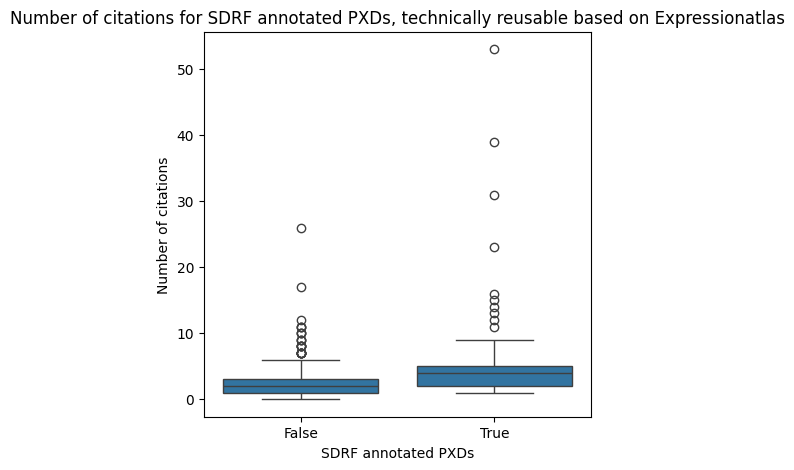

In [21]:
#make a boxplot of citations of SDRF versus not SDRF annotated PXDs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.boxplot(x='SDRF', y='EuropePMC_number_of_citations', data=final_df)
plt.xlabel("SDRF annotated PXDs")
plt.ylabel("Number of citations")
plt.title("Number of citations for SDRF annotated PXDs, technically reusable based on Expressionatlas")
plt.show()

In [22]:
random_citation_df['SDRF'] = False

/tmp/ipykernel_72989/1686975434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_sdrf['Dataset'] = 'SDRF annotated'
/tmp/ipykernel_72989/1686975434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_not_sdrf['Dataset'] = 'Not SDRF annotated'


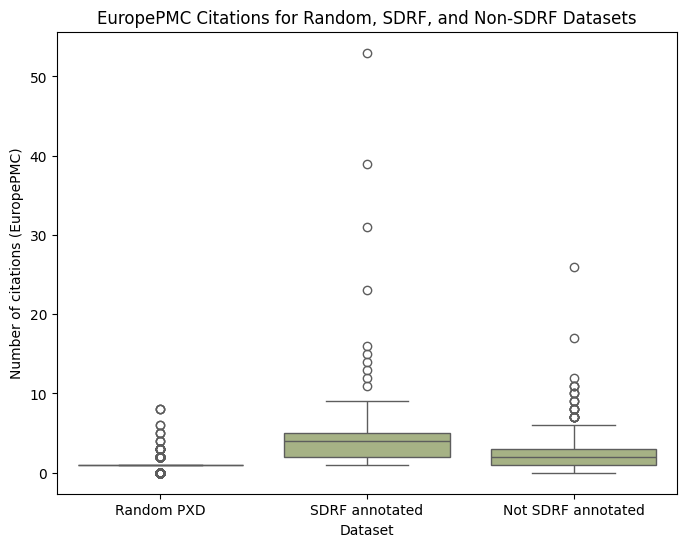

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
random_citation_df['Dataset'] = 'Random PXD'
final_df_sdrf = final_df[final_df.SDRF == True]
final_df_sdrf['Dataset'] = 'SDRF annotated'
final_df_not_sdrf = final_df[final_df.SDRF == False]
final_df_not_sdrf['Dataset'] = 'Not SDRF annotated'

# Create a combined dataframe
combined_df = pd.concat([random_citation_df, final_df_sdrf, final_df_not_sdrf])

# Create the boxplot with modified color
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dataset', y='EuropePMC_number_of_citations', data=combined_df, color='#A9BA7D')
plt.xlabel("Dataset")
plt.ylabel("Number of citations (EuropePMC)")
plt.title("EuropePMC Citations for Random, SDRF, and Non-SDRF Datasets")

# Save the plot as a high-quality image
plt.savefig('boxplot.png', dpi=300)


In [27]:
import pandas as pd
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'PRIDE': [760, 1235, 1569, 1885, 2585, 2903, 4057, 4346, 4353, 3829, 1145],
    'Publications': [114, 101, 131, 163, 187, 208, 241, 311, 343, 409, 302]
}

figure_df = pd.DataFrame(data)
figure_df


,Year,PRIDE,Publications
0,2014,760,114
1,2015,1235,101
2,2016,1569,131
3,2017,1885,163
4,2018,2585,187
5,2019,2903,208
6,2020,4057,241
7,2021,4346,311
8,2022,4353,343
9,2023,3829,409


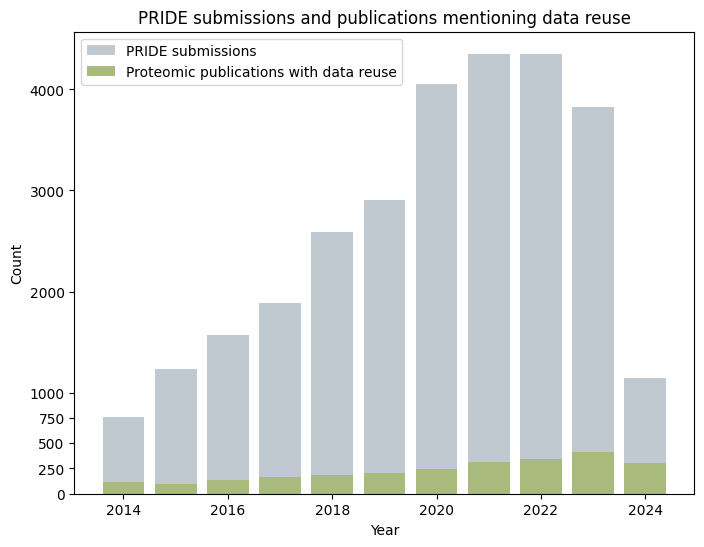

In [58]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the number of submitted PXDs
plt.bar(figure_df['Year'], figure_df['PRIDE'], label='PRIDE submissions', color='#BFC9CF')

# Plot the number of publications mentioning "data reuse"
plt.bar(figure_df['Year'], figure_df['Publications'], label='Proteomic publications with data reuse', color='#A9BA7D')

# Add labels on the y-axis
plt.yticks([0, 250, 500, 750, 1000, 2000, 3000, 4000])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('PRIDE submissions and publications mentioning data reuse')

# Add legend
plt.legend()
plt.savefig('barplot.png', dpi=300)

